# F21DL Data Mining and Machine Learning:  Your DM&ML Portfolio

#### Part 1

In [121]:
!pip install opencv-python

     |████████████████████████████████| 54.7 MB 1.1 MB/s eta 0:00:01


In [75]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import cv2  # OpenCV Python library for computer vision

# Sampling Libraries
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [3]:
# Load the dataset
xtrain = pd.read_csv('x_train_all.csv')
ytrain = pd.read_csv('y_train_all.csv')

## Data Exploration

In [4]:
# Display the first few rows of the dataset
print(xtrain.head(5))

      0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]


In [5]:
ytrain.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
xtrain.shape

(9690, 2304)

In [7]:
ytrain.shape

(9690, 1)

In [8]:
# Summary statistics
xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [9]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


## Missing values analysis

In [10]:
# Check for missing values
missing_values = xtrain.isnull().sum()
print("Missing Values:")
print("----------------")
print(missing_values)
## There is no missing values...

Missing Values:
----------------
0       0
1       0
2       0
3       0
4       0
       ..
2299    0
2300    0
2301    0
2302    0
2303    0
Length: 2304, dtype: int64


## Findings

There is no missing values in the dataset and so we are good here..

## Glimpse of data

In [11]:
X = xtrain.values
X[0]

array([78., 77., 76., ..., 98., 95., 94.])

In [12]:
Y = ytrain.values
Y[1657]

array([1])

In [13]:
Y.dtype

dtype('int64')

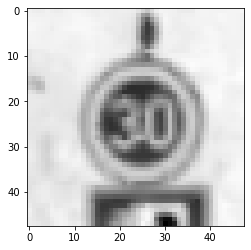

In [14]:
some_digit = X[1500]
some_digit_image = some_digit.reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

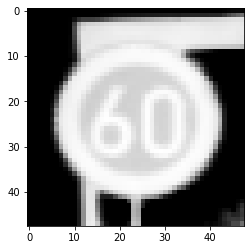

In [15]:
some_digit = X[5000]
some_digit_image = some_digit.reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

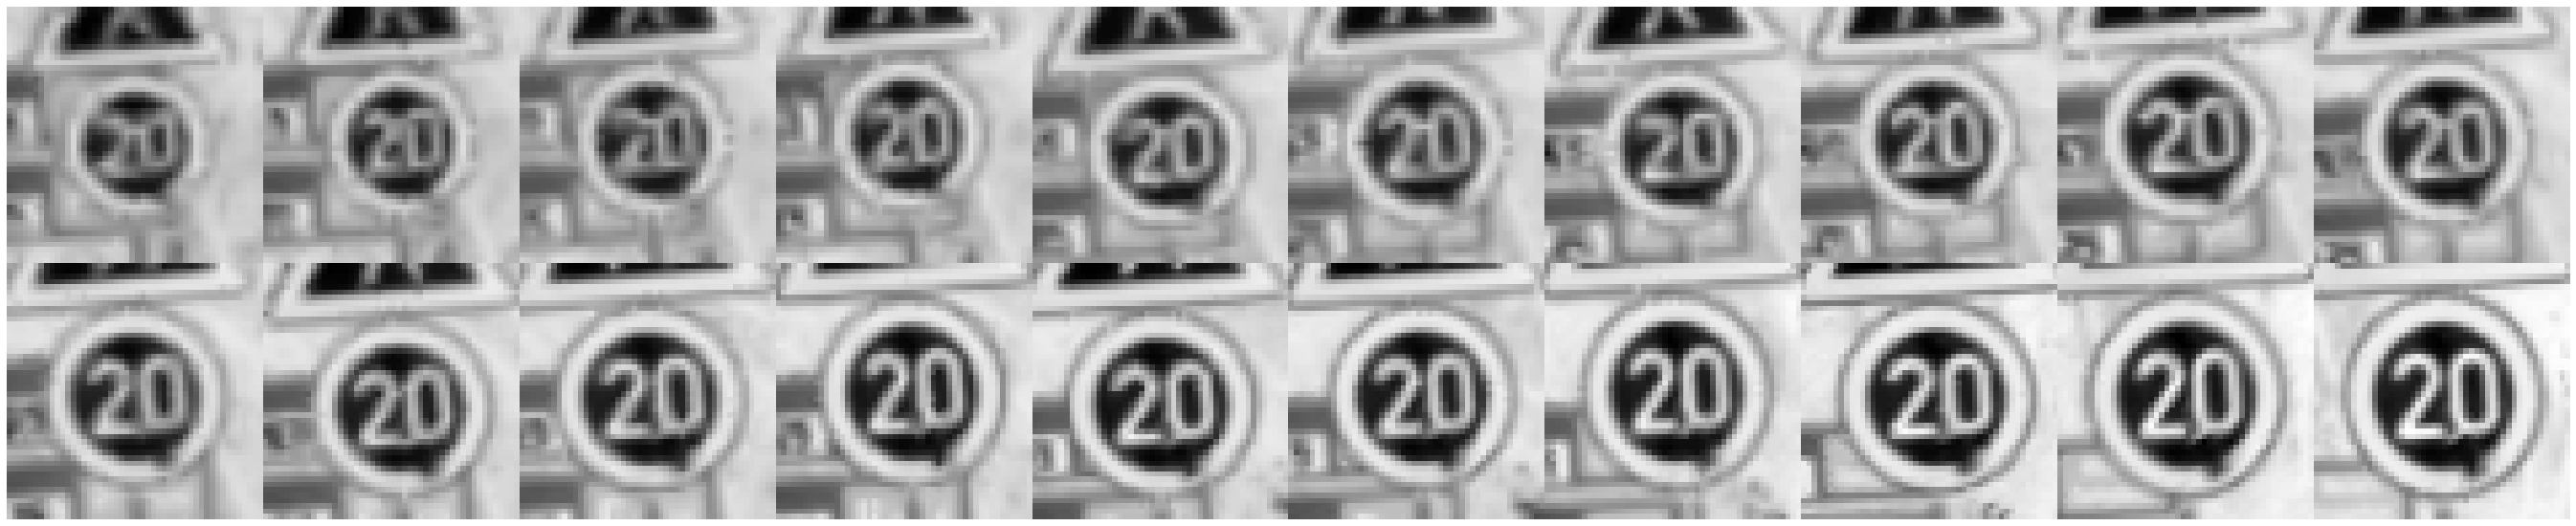

In [16]:
def plot_digits(instances, images_per_row=10, **options):
    size = 48  # Change the size to match your image size (48x48)
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(48, 48))
example_images = X[:20]
plot_digits(example_images, images_per_row=10)
plt.show()


## Findings

Looking at above sample traffic signal images, they are speed limit signals like 30km/hour, 60km/hour, etc..

## Outlier analysis

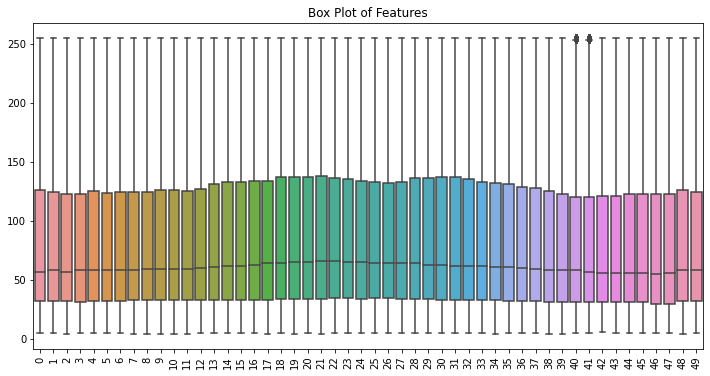

In [17]:
#Randomly checking if the feature has any outliers
subset_of_features = xtrain.iloc[:, :50]  # Example: Checking outliers for the first 50 features
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_of_features)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

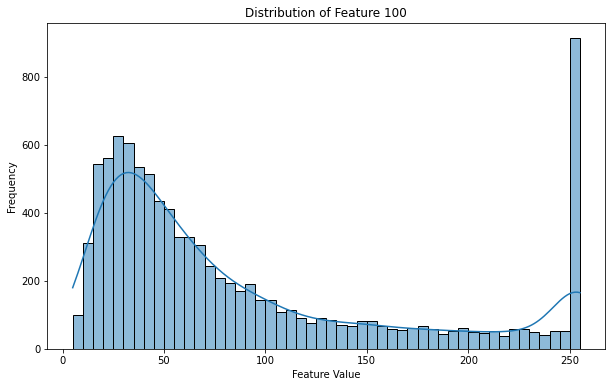

Number of outliers: 0
Minimum value: 5.0
Maximum value: 255.0
Mean value: 88.88844169246646
Standard deviation: 76.52516290632715
Lower threshold for outliers: -293.7373728391693
Upper threshold for outliers: 471.51425622410227


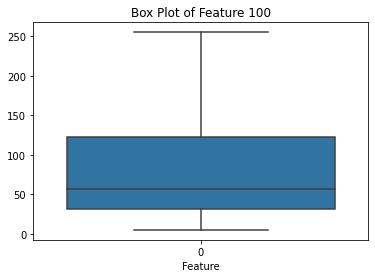

In [18]:

# Need to visualize sample single image feature to understand the pattern, for example am taking 
# index 0, 100, 1000 for my analysis
feature_index = 100
selected_feature = xtrain.iloc[:, feature_index]

# Visualize the distribution of the selected feature
plt.figure(figsize=(10, 6))
sns.histplot(selected_feature, bins=50, kde=True)
plt.title(f'Distribution of Feature {feature_index}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for outliers (e.g., values outside of 3 standard deviations from the mean)
threshold = 5  # You can adjust this threshold based on your data and problem

# Identify outliers
mean_value = np.mean(selected_feature)
std_deviation = np.std(selected_feature)
lower_threshold = mean_value - threshold * std_deviation
upper_threshold = mean_value + threshold * std_deviation

outliers = selected_feature[(selected_feature < lower_threshold) | (selected_feature > upper_threshold)]

# Print information about outliers
print(f'Number of outliers: {len(outliers)}')
print(f'Minimum value: {selected_feature.min()}')
print(f'Maximum value: {selected_feature.max()}')
print(f'Mean value: {mean_value}')
print(f'Standard deviation: {std_deviation}')
print(f'Lower threshold for outliers: {lower_threshold}')
print(f'Upper threshold for outliers: {upper_threshold}')

# Optionally, you can visualize the outliers using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=selected_feature)
plt.title(f'Box Plot of Feature {feature_index}')
plt.xlabel('Feature')
plt.show()


## Findings

There are no outliers detected for this specific feature. All data points fall within the defined outlier threshold limits.

The absence of outliers for the set of sample feature suggests that it may not require us performing any outlier-specific treatment.

## Analyzing number of classes or labels

In [19]:
# Check how many classes are available in ytrain
num_classes = ytrain['0'].nunique()
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 10


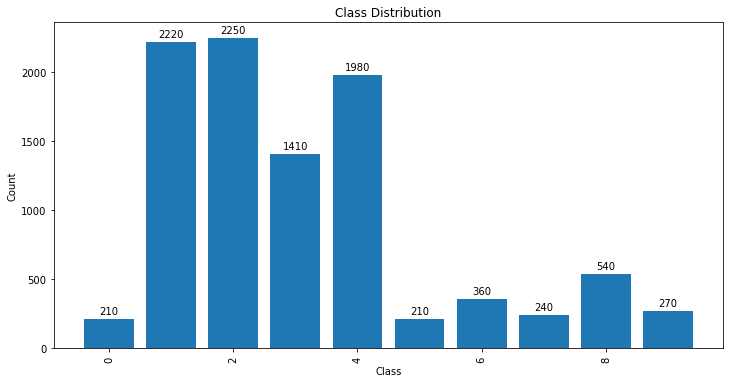

In [20]:
class_counts = ytrain['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


# Findings

There is a significant class imbalance in the dataset. Class 2 and Class 1 have the highest counts (2250 and 2220, respectively), while other classes have considerably lower counts. This imbalance may pose challenges when training a machine learning model, as the model might be biased towards the majority classes.

To address this issue and improve model performance while avoiding overfitting problems, we can consider the following techniques:

1. **Class Balancing**: We might consider techniques to address class imbalance, such as oversampling the minority classes (creating more samples for the underrepresented classes) or undersampling the majority classes (reducing the number of samples for the overrepresented classes). Another approach is using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique).

2. **Data Augmentation**: Since this is image data, data augmentation can be beneficial as well. Generate augmented images by applying random transformations like rotation, scaling, and flipping to increase the diversity of your dataset. This can help the model perform better on all classes.

Let's experiment with the above two techniques and validate their performances.


### Do we need to apply any preprocessing or normalization procedures? If so, why?

Whether we need to perform feature scaling on our dataset depends on the machine learning algorithms 
we plan to use and the nature of the features. 

Here are some considerations to help you decide if feature scaling is necessary for our dataset:

1. Many machine learning algorithms are sensitive to the scale of features. Examples include gradient-based optimization algorithms (e.g., gradient descent), k-nearest neighbors, and support vector machines. Rescaling features can help these algorithms converge faster and produce better results.

2. Algorithms that rely on distance metrics, such as k-means clustering, hierarchical clustering, and some variants of principal component analysis (PCA), can be influenced by the scale of features. 

***Tree-based algorithms are fairly insensitive to the scale of the features***

Related Articles:
    https://www.analyticsvidhya.com/blog/2022/10/frequently-asked-interview-questions-on-naive-bayes-classifier/#:~:text=A%20sure%20short%20answer%20should,will%20not%20require%20feature%20scaling.
    https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048#:~:text=Feature%20scaling%20is%20the%20process,need%20to%20perform%20feature%20scaling.
    https://atoti.io/articles/when-to-perform-a-feature-scaling/

## Bayes Algorithm

***Do we need feature scaling for Bayes Net?***

Naïve Bayes is generally not sensitive to feature scaling because it's based on probability and conditional independence assumptions rather than the absolute values of features. This property makes Naïve Bayes one of the few machine learning algorithms that often work well without the need for feature scaling.

## Multinomial NB

## Preprocessing - Experiment1: Class Balancing (Over Sampling)

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset


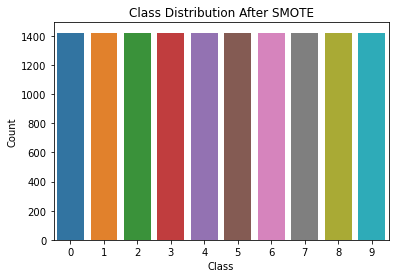

In [60]:
# Visualize oversampled data
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perfect to go!

### Model training, prediction and validation on original data

In [61]:
# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation and get predictions
y_pred = cross_val_predict(nb_classifier, X_train, y_train, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Generate a classification report
report = classification_report(y_train, y_pred)

# Create a confusion matrix
confusion = confusion_matrix(y_train, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.3634897597161748
              precision    recall  f1-score   support

           0       0.10      0.36      0.16       119
           1       0.44      0.22      0.29      1423
           2       0.39      0.32      0.35      1412
           3       0.32      0.38      0.35       885
           4       0.42      0.62      0.50      1285
           5       0.21      0.61      0.32       143
           6       0.22      0.08      0.12       228
           7       0.41      0.39      0.39       161
           8       0.69      0.26      0.38       368
           9       0.28      0.27      0.27       177

    accuracy                           0.36      6201
   macro avg       0.35      0.35      0.31      6201
weighted avg       0.40      0.36      0.36      6201

Confusion Matrix:
 [[ 43  21  23  20  10   0   2   0   0   0]
 [237 314 286 204 318   3  23   3   4  31]
 [ 85 126 450 193 512  20   6   2   4  14]
 [ 34  95 185 338 219   5   4   1   2   2]
 [ 30 113 114 214 798

/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

### Model training, prediction and validation on oversampled data

In [29]:
# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation and get predictions
y_pred_over = cross_val_predict(nb_classifier, X_train_resampled, y_train_resampled, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_resampled, y_pred_over)

# Generate a classification report
report = classification_report(y_train_resampled, y_pred_over)

# Create a confusion matrix
confusion = confusion_matrix(y_train_resampled, y_pred_over)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.3611266034578918
              precision    recall  f1-score   support

           0       0.54      0.42      0.47      1793
           1       0.26      0.17      0.21      1793
           2       0.26      0.29      0.28      1793
           3       0.30      0.38      0.34      1793
           4       0.38      0.62      0.47      1793
           5       0.32      0.66      0.43      1793
           6       0.36      0.20      0.26      1793
           7       0.45      0.35      0.39      1793
           8       0.40      0.26      0.31      1793
           9       0.53      0.26      0.35      1793

    accuracy                           0.36     17930
   macro avg       0.38      0.36      0.35     17930
weighted avg       0.38      0.36      0.35     17930

Confusion Matrix:
 [[ 748  295  323  222  151    0   11    0    3   40]
 [ 364  307  329  240  412   20   42    6   16   57]
 [ 120  139  525  239  652   51   11    9    9   38]
 [  82  164  319  687  491   10   

## Experiment2: Class Balancing (Under Sampling)

In [48]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the RandomUnderSampler to the training data only
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data with undersampling
# we can proceed to train your machine learning model on this balanced dataset


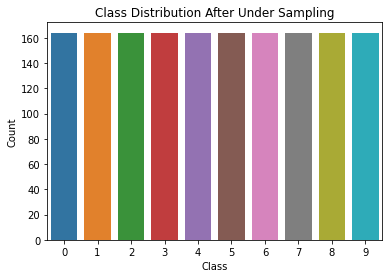

In [45]:
# Visualize oversampled data
sns.countplot(x=y_train_under)
plt.title('Class Distribution After Under Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perfect to go!

In [47]:
# Create a Multinomial Naïve Bayes classifier
nb = MultinomialNB()

# Perform cross-validation and get predictions
y_pred_under = cross_val_predict(nb, X_train_under, y_train_under, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_under, y_pred_under)

# Generate a classification report
report = classification_report(y_train_under, y_pred_under)

# Create a confusion matrix
confusion = confusion_matrix(y_train_under, y_pred_under)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.3548780487804878
              precision    recall  f1-score   support

           0       0.55      0.40      0.46       164
           1       0.29      0.16      0.21       164
           2       0.32      0.35      0.33       164
           3       0.30      0.45      0.36       164
           4       0.37      0.64      0.47       164
           5       0.33      0.67      0.44       164
           6       0.29      0.13      0.18       164
           7       0.44      0.29      0.35       164
           8       0.35      0.24      0.28       164
           9       0.41      0.21      0.28       164

    accuracy                           0.35      1640
   macro avg       0.36      0.35      0.34      1640
weighted avg       0.36      0.35      0.34      1640

Confusion Matrix:
 [[ 66  22  25  22  21   0   3   1   1   3]
 [ 28  27  34  22  37   0   6   0   4   6]
 [ 10  13  57  18  62   1   1   0   0   2]
 [  9   8  21  73  47   0   5   0   0   1]
 [  3  10  15  27 105

## Lets try the same experiment on binary dataset

### 1) Multinormial NB

In [52]:
# Load the dataset
xtrain_bin = pd.read_csv('x_train_bin.csv')
ytrain_bin = pd.read_csv('y_train_bin.csv')

In [57]:
xtrain_bin.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,107.626337,107.997531,107.642387,107.848148,108.282716,108.447325,109.094650,109.758848,109.731687,110.120988,...,98.186831,97.595885,97.439918,96.228807,94.332922,92.999177,91.760905,90.911111,90.803292,90.398354
std,76.491958,76.997490,76.947931,76.651862,76.140000,75.619028,75.465342,75.633040,75.917473,76.222585,...,69.569017,69.781701,70.654812,71.118045,71.099191,70.851337,70.482417,70.175053,69.958424,70.347243
min,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
25%,48.000000,49.000000,49.000000,49.000000,50.000000,52.000000,51.000000,52.000000,51.000000,50.000000,...,42.000000,43.000000,43.000000,42.000000,41.000000,41.000000,40.000000,39.000000,39.000000,39.000000
50%,79.000000,79.000000,78.000000,79.000000,79.000000,80.000000,81.000000,81.000000,80.000000,82.000000,...,75.000000,75.000000,73.000000,71.000000,67.000000,66.000000,64.000000,64.000000,64.000000,62.000000
75%,156.000000,155.000000,153.750000,154.000000,153.000000,152.000000,152.000000,157.750000,157.750000,159.000000,...,140.000000,140.000000,137.000000,134.000000,127.000000,127.000000,126.750000,126.000000,125.000000,125.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


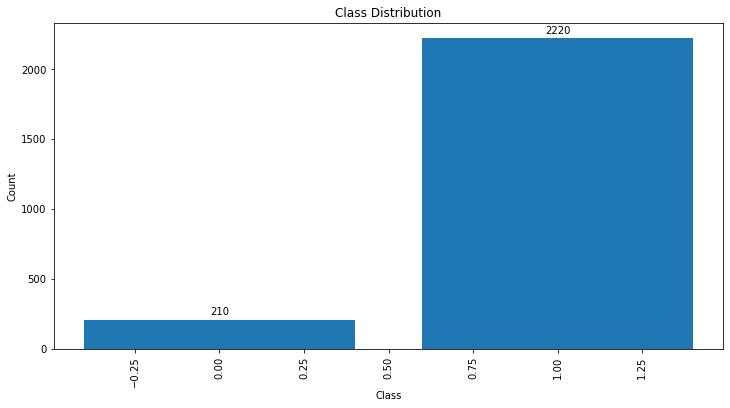

In [55]:
class_counts = ytrain_bin['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


In [68]:
# number of unique classes (used later in "class_prior parameter")
n_classes = np.unique(y_train_binresampled)

# tuning the multinomial NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

MNNBGRID = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
MNNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Accuracy Through Grid Search : {:.3f}'.format(MNNBGRID.best_score_))
print('Best Parameters : {}\n'.format(MNNBGRID.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

Best Accuracy Through Grid Search : 0.635
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}



/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
# Split the data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(xtrain_bin, ytrain_bin, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_binresampled, y_train_binresampled = smote.fit_resample(X_train_bin, y_train_bin)
y_train_binresampled = np.array(y_train_binresampled).ravel()

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset

# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB(alpha= 0.01, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_binover = cross_val_predict(nb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_bin = accuracy_score(y_train_binresampled, y_pred_binover)

# Generate a classification report
report_bin = classification_report(y_train_binresampled, y_pred_binover)

# Create a confusion matrix
confusion_bin = confusion_matrix(y_train_binresampled, y_pred_binover)

# Print the metrics
print(f"Accuracy: {accuracy_bin}")
print(report_bin)
print("Confusion Matrix:\n", confusion_bin)


Accuracy: 0.6347997743936831
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

Confusion Matrix:
 [[1023  750]
 [ 545 1228]]


/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y 

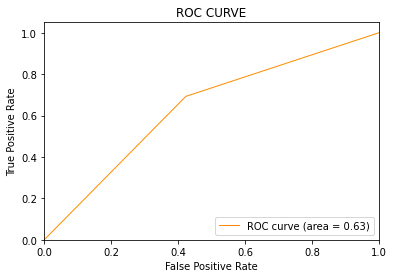

[CV 4/5] END alpha=0.01, class_prior=None, fit_prior=True;, score=0.638 total time=   0.2s
[CV 5/5] END alpha=0.01, class_prior=[0.1, 0.1], fit_prior=True;, score=0.632 total time=   0.1s
[CV 2/5] END alpha=0.1, class_prior=None, fit_prior=True;, score=0.609 total time=   0.1s
[CV 1/5] END alpha=0.1, class_prior=None, fit_prior=False;, score=0.641 total time=   0.1s
[CV 5/5] END alpha=0.1, class_prior=[0.1, 0.1], fit_prior=True;, score=0.632 total time=   0.1s
[CV 2/5] END alpha=0.5, class_prior=None, fit_prior=True;, score=0.609 total time=   0.1s
[CV 5/5] END alpha=0.5, class_prior=None, fit_prior=False;, score=0.632 total time=   0.1s
[CV 3/5] END alpha=0.5, class_prior=[0.1, 0.1], fit_prior=False;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=1.0, class_prior=None, fit_prior=True;, score=0.632 total time=   0.1s
[CV 3/5] END alpha=1.0, class_prior=[0.1, 0.1], fit_prior=True;, score=0.654 total time=   0.1s
[CV 5/5] END alpha=1.0, class_prior=[0.1, 0.1], fit_prior=False;, score

In [72]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_binover)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 2)BernoulliNB Model

In [87]:
# tuning the Bernoulli NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

BNBGRID = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
BNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(BNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(BNBGRID.best_score_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:1183: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:1183: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:1183: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:1183: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:1183: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/User

Best Parameters : {'alpha': 0.01, 'binarize': 10.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.514



In [88]:
# Create a Multinomial Naïve Bayes classifier
bnb_classifier = BernoulliNB(alpha= 0.01, binarize = 10.0, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_binover1 = cross_val_predict(bnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_bin1 = accuracy_score(y_train_binresampled, y_pred_binover)

# Generate a classification report
report_bin1 = classification_report(y_train_binresampled, y_pred_binover)

# Create a confusion matrix
confusion_bin1 = confusion_matrix(y_train_binresampled, y_pred_binover)

# Print the metrics
print(f"Accuracy: {accuracy_bin1}")
print(report_bin1)
print("Confusion Matrix:\n", confusion_bin1)

Accuracy: 0.6347997743936831
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

Confusion Matrix:
 [[1023  750]
 [ 545 1228]]


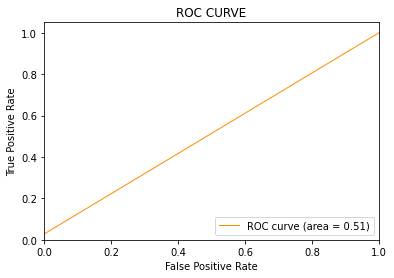

In [79]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_binover1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 3) Gaussian NB

In [89]:
# Define the parameter grid for Gaussian Naïve Bayes
params = {
    'priors': [None, [0.1] * len(n_classes)],
}

# Create a Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Use GridSearchCV to tune the Gaussian Naïve Bayes classifier
GNBGRID = GridSearchCV(gnb_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=5)
GNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(GNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(GNBGRID.best_score_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters : {'priors': None}
Best Accuracy Through Grid Search : 0.790



/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py", line 245, in fit
    return self._partial_fit(
  File "/Users/pramodkumarnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py", line 431, in _partial_fit

In [86]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB(priors= None)

# Perform cross-validation and get predictions
y_pred_gnb = cross_val_predict(gnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_train_binresampled, y_pred_gnb)

# Generate a classification report
report_gnb = classification_report(y_train_binresampled, y_pred_gnb)

# Create a confusion matrix
confusion_gnb = confusion_matrix(y_train_binresampled, y_pred_gnb)

# Print the metrics
print(f"Accuracy: {accuracy_gnb}")
print(report_gnb)
print("Confusion Matrix:\n", confusion_gnb)


Accuracy: 0.7896221094190637
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1773
           1       0.82      0.74      0.78      1773

    accuracy                           0.79      3546
   macro avg       0.79      0.79      0.79      3546
weighted avg       0.79      0.79      0.79      3546

Confusion Matrix:
 [[1487  286]
 [ 460 1313]]
[CV 3/5] END ...................priors=[0.1, 0.1];, score=nan total time=   0.5s
[CV 3/5] END .......................priors=None;, score=0.838 total time=   0.7s
[CV 2/5] END ...................priors=[0.1, 0.1];, score=nan total time=   0.5s
[CV 5/5] END ...................priors=[0.1, 0.1];, score=nan total time=   0.2s
[CV 1/5] END ...................priors=[0.1, 0.1];, score=nan total time=   0.2s
[CV 4/5] END ...................priors=[0.1, 0.1];, score=nan total time=   0.6s
[CV 1/5] END .......................priors=None;, score=0.756 total time=   0.8s
[CV 2/5] END ..................

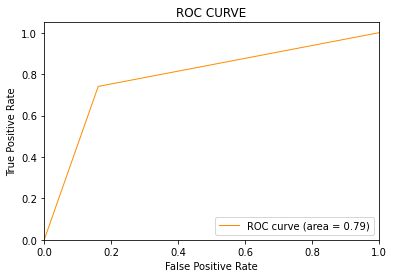

In [84]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_gnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 4) Complement NB

In [92]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Complement Naïve Bayes
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
    'fit_prior': [True, False],
}

# Create a Complement Naïve Bayes classifier
cnb_classifier = ComplementNB()

# Use GridSearchCV to tune the Complement Naïve Bayes classifier
CNBGRID = GridSearchCV(cnb_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=5)
CNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(CNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(CNBGRID.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters : {'alpha': 0.01, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.635



In [93]:
from sklearn.naive_bayes import ComplementNB

# Create a Complement Naïve Bayes classifier
cnb_classifier = ComplementNB(alpha = 0.01, fit_prior = True)

# Perform cross-validation and get predictions
y_pred_cnb = cross_val_predict(cnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_cnb = accuracy_score(y_train_binresampled, y_pred_cnb)

# Generate a classification report
report_cnb = classification_report(y_train_binresampled, y_pred_cnb)

# Create a confusion matrix
confusion_cnb = confusion_matrix(y_train_binresampled, y_pred_cnb)

# Print the metrics
print(f"Accuracy: {accuracy_cnb}")
print(report_cnb)
print("Confusion Matrix:\n", confusion_cnb)


Accuracy: 0.6347997743936831
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

Confusion Matrix:
 [[1023  750]
 [ 545 1228]]


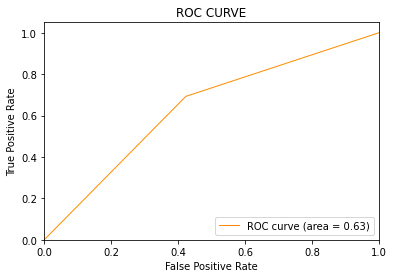

In [94]:
# printing ROC curve in order to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_cnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Correlating Features

In [104]:
# Load the dataset
x_train_all = pd.read_csv('x_train_all.csv')
y_train_0 = pd.read_csv('0_vrs_all/y_train_0.csv')

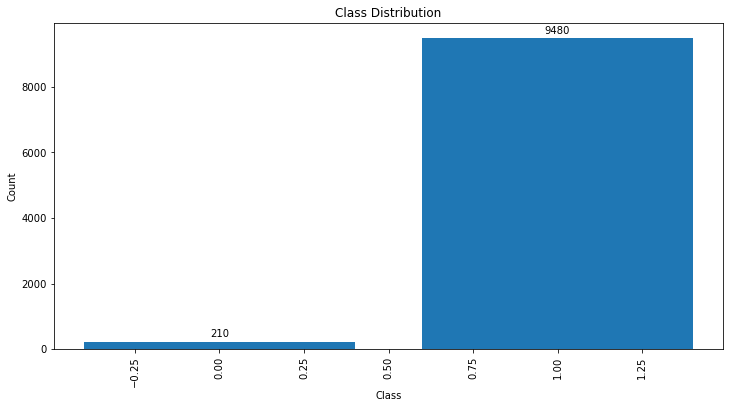

In [105]:
class_counts = y_train_0['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


In [107]:
# Choose the class of interest (e.g., class 1)
class_of_interest = 0

# Calculate correlations for the class of interest
correlations = x_train_all.corrwith((y_train_0 == class_of_interest).astype(int))

# Sort features by absolute correlation values in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features = sorted_correlations.head(5)
top_10_features = sorted_correlations.head(10)
top_20_features = sorted_correlations.head(20)

# Display the top features
print("Top 5 Features:")
print(top_5_features)

print("\nTop 10 Features:")
print(top_10_features)

print("\nTop 20 Features:")
print(top_20_features)


Top 5 Features:
0       0.058439
1            NaN
10           NaN
100          NaN
1000         NaN
dtype: float64

Top 10 Features:
0       0.058439
1            NaN
10           NaN
100          NaN
1000         NaN
1001         NaN
1002         NaN
1003         NaN
1004         NaN
1005         NaN
dtype: float64

Top 20 Features:
0       0.058439
1            NaN
10           NaN
100          NaN
1000         NaN
1001         NaN
1002         NaN
1003         NaN
1004         NaN
1005         NaN
1006         NaN
1007         NaN
1008         NaN
1009         NaN
101          NaN
1010         NaN
1011         NaN
1012         NaN
1013         NaN
1014         NaN
dtype: float64
